In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Electromagnetically-bright fraction

The Biscoveanu2022 results use four events from O3: GW200105, GW200115, and two less significant candidates. For consistency with the LVK O3 populations paper, for the GW230529 paper we only include GW200105 and GW200115 (FAR < 0.25) among the O3 events. The Biscoveanu2022 results also use the GW+PSR+NICER equations of state. For the sake of comparison, we also use those equations of state for the new results for the GW230529 paper, though the main results highlighted in the paper will be only include the GW+PSR results. The NICER EoS + GW230529 results are mentioned in Appendix B.

In [2]:
emfrac_old_result = np.loadtxt('/home/sylvia.biscoveanu/nsbh/gwtc-3/outdir/gw_only_nsbh_ns_spin_pairing_gaussian_v2_embright_fraction_realistic_EOS.dat', skiprows=1)

In [3]:
emfrac_old_eos = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/gw_only_S230529ay_nsbh_ns_spin_pairing_gaussian_embright_fraction_NICER_EOS.dat', skiprows=1)

In [4]:
emfrac_new_result = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/gw_only_S230529ay_nsbh_ns_spin_pairing_gaussian_embright_fraction_realistic_EOS.dat', skiprows=1)

In [5]:
emfrac_o3_old_eos = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/extras/gw_only_nsbh_ns_spin_pairing_gaussian_embright_fraction_NICER_EOS.dat', skiprows=1)

In [6]:
emfrac_o3_new_eos = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/gw_only_nsbh_ns_spin_pairing_gaussian_embright_fraction_realistic_EOS.dat', skiprows=1)

Text(0.5, 0, 'Electromagnetically-bright fraction')

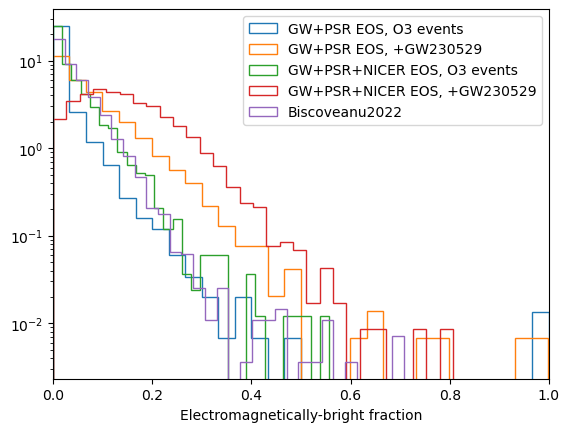

In [7]:
plt.hist(emfrac_o3_new_eos.T[0], histtype='step', bins=30, density=True, label='GW+PSR EOS, O3 events')
plt.hist(emfrac_new_result.T[0], histtype='step', bins=30, density=True, label='GW+PSR EOS, +GW230529')
plt.hist(emfrac_o3_old_eos.T[0], histtype='step', bins=30, density=True, label='GW+PSR+NICER EOS, O3 events')
plt.hist(emfrac_old_eos.T[0], histtype='step', bins=30, density=True, label='GW+PSR+NICER EOS, +GW230529')
plt.hist(emfrac_old_result.T[0], histtype='step', bins=30, density=True, label='Biscoveanu2022')
plt.legend()
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('Electromagnetically-bright fraction')

## EOS data comparison

In [8]:
import h5py

In [9]:
eos_data = h5py.File("/home/michael.zevin/projects/o4/gw230529/analysis_results/extreme_matter/inputs/LCEHL_EOS_posterior_samples_PSR+GW.h5","r")
eos_data_nicer = h5py.File("/home/michael.zevin/projects/o4/gw230529/analysis_results/extreme_matter/inputs/LCEHL_EOS_posterior_samples_PSR+GW+NICER.h5","r")

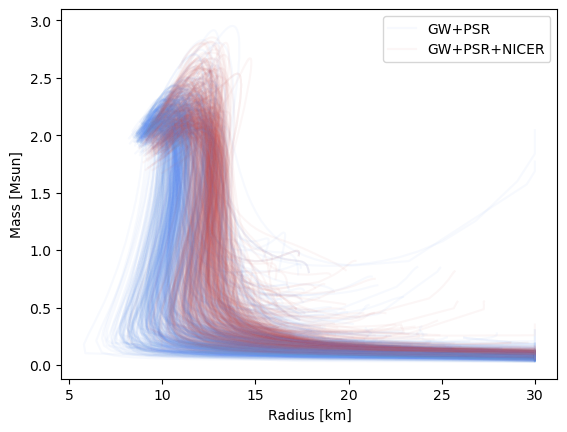

In [10]:
num_eos = len(eos_data["ns"].keys())
inds = np.random.randint(0, num_eos, 500)
for i in inds:
    plt.plot(eos_data["ns"]["eos_{}".format(i)]["R"], eos_data["ns"]["eos_{}".format(i)]["M"], color='cornflowerblue', alpha=0.05)
    plt.plot(eos_data_nicer["ns"]["eos_{}".format(i)]["R"], eos_data_nicer["ns"]["eos_{}".format(i)]["M"], color='indianred', alpha=0.05)
plt.ylabel('Mass [Msun]')
plt.xlabel('Radius [km]')
plt.plot(eos_data["ns"]["eos_0"]["R"], eos_data["ns"]["eos_0"]["M"], color='cornflowerblue', alpha=0.05, label='GW+PSR')
plt.plot(eos_data_nicer["ns"]["eos_0"]["R"], eos_data_nicer["ns"]["eos_0"]["M"], color='indianred', alpha=0.05, label='GW+PSR+NICER')
plt.legend()

## GRB progenitor rate and total ejecta mass

In [11]:
data_total_o3 = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/gw_only_nsbh_ns_spin_pairing_gaussian_total_embright.dat', skiprows=1)
data_total = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/gw_only_S230529ay_nsbh_ns_spin_pairing_gaussian_total_embright.dat', skiprows=1)
data_total_o3_nicer = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/extras/gw_only_nsbh_ns_spin_pairing_gaussian_total_embright_NICER.dat', skiprows=1)
data_total_nicer = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/extras/gw_only_S230529ay_nsbh_ns_spin_pairing_gaussian_total_embright_NICER.dat', skiprows=1)
data_old_total = np.loadtxt('/home/sylvia.biscoveanu/nsbh/gwtc-3/outdir/gw_only_nsbh_ns_spin_pairing_gaussian_v2_total_embright.dat', skiprows=1)

In [12]:
np.quantile(data_total_o3_nicer.T[0], 0.9), np.quantile(data_old_total.T[0], 0.9)

(0.23694752266441285, 0.7002452211772583)

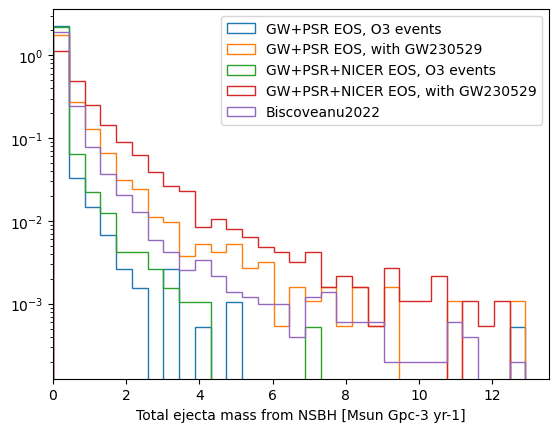

In [13]:
_, bins, _ = plt.hist(data_total_o3.T[0], histtype='step', bins=30, density=True, label='GW+PSR EOS, O3 events')
plt.hist(data_total.T[0], histtype='step', bins=bins, density=True, label='GW+PSR EOS, with GW230529')
plt.hist(data_total_o3_nicer.T[0], histtype='step', bins=bins, density=True, label='GW+PSR+NICER EOS, O3 events')
plt.hist(data_total_nicer.T[0], histtype='step', bins=bins, density=True, label='GW+PSR+NICER EOS, with GW230529')
plt.hist(data_old_total.T[0], histtype='step', bins=bins, density=True, label='Biscoveanu2022')
plt.xlabel('Total ejecta mass from NSBH [Msun Gpc-3 yr-1]')
plt.xlim(0,)
plt.yscale('log')
plt.legend()

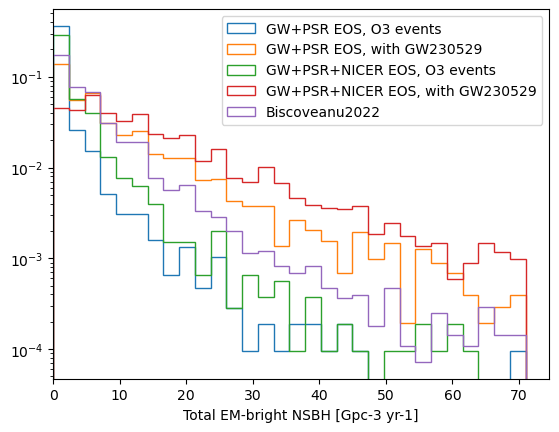

In [14]:
_, bins, _ = plt.hist(data_total_o3.T[1], histtype='step', bins=30, density=True, label='GW+PSR EOS, O3 events')
plt.hist(data_total.T[1], histtype='step', bins=bins, density=True, label='GW+PSR EOS, with GW230529')
plt.hist(data_total_o3_nicer.T[1], histtype='step', bins=bins, density=True, label='GW+PSR+NICER EOS, O3 events')
plt.hist(data_total_nicer.T[1], histtype='step', bins=bins, density=True, label='GW+PSR+NICER EOS, with GW230529')
plt.hist(data_old_total.T[1], histtype='step', bins=bins, density=True, label='Biscoveanu2022')
plt.xlabel('Total EM-bright NSBH [Gpc-3 yr-1]')
plt.xlim(0,)
plt.yscale('log')
plt.legend()

## Remnant mass

In [15]:
mrem = np.loadtxt('/home/michael.zevin/projects/o4/gw230529/analysis_results/populations/EMBright/final/event_remnant_mass.dat', skiprows=1)

In [16]:
np.quantile(mrem.T[0], 0.99), np.quantile(mrem.T[1], 0.99)

(0.05157955033408142, 0.01145643503386524)

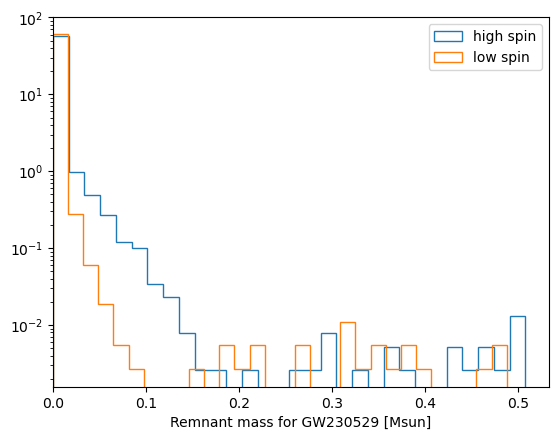

In [17]:
plt.hist(mrem.T[0], histtype='step', bins=30, density=True, label='high spin')
plt.hist(mrem.T[1], histtype='step', bins=30, density=True, label='low spin')
plt.xlabel('Remnant mass for GW230529 [Msun]')
plt.yscale('log')
plt.xlim(0,)
plt.legend()